 # Predicting Stock Prices
 Author - Prakhar Prasad

## Import the required python libraries

In [2]:
# usual imports
import pandas as pd
import numpy as np

# visualization imports
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# ignore unwanted warnings
import warnings
warnings.filterwarnings(action='ignore',message='')

# view all the columns of the dataframe
pd.options.display.max_columns = None

# consistent image plot
from pylab import rcParams
rcParams['figure.figsize'] = 15,7
rcParams['axes.labelsize'] = 12
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12

## Load the dataset

In [85]:
prices = pd.read_csv('/cxldata/datasets/project/ny_stock_prediction/prices-split-adjusted.csv')

In [86]:
fundamentals = pd.read_csv('/cxldata/datasets/project/ny_stock_prediction/fundamentals.csv')

## Data Exploration

In [87]:
# check the first few rows of the stock prices
prices.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [88]:
# check the top five rows of the fundamentals
fundamentals.head()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,Cost of Revenue,Current Ratio,Deferred Asset Charges,Deferred Liability Charges,Depreciation,Earnings Before Interest and Tax,Earnings Before Tax,Effect of Exchange Rate,Equity Earnings/Loss Unconsolidated Subsidiary,Fixed Assets,Goodwill,Gross Margin,Gross Profit,Income Tax,Intangible Assets,Interest Expense,Inventory,Investments,Liabilities,Long-Term Debt,Long-Term Investments,Minority Interest,Misc. Stocks,Net Borrowings,Net Cash Flow,Net Cash Flow-Operating,Net Cash Flows-Financing,Net Cash Flows-Investing,Net Income,Net Income Adjustments,Net Income Applicable to Common Shareholders,Net Income-Cont. Operations,Net Receivables,Non-Recurring Items,Operating Income,Operating Margin,Other Assets,Other Current Assets,Other Current Liabilities,Other Equity,Other Financing Activities,Other Investing Activities,Other Liabilities,Other Operating Activities,Other Operating Items,Pre-Tax Margin,Pre-Tax ROE,Profit Margin,Quick Ratio,Research and Development,Retained Earnings,Sale and Purchase of Stock,"Sales, General and Admin.",Short-Term Debt / Current Portion of Long-Term Debt,Short-Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,0.0,127000000.0,1.049900e+10,78.0,0.000000e+00,223000000.0,1.001000e+09,-1.813000e+09,-2.445000e+09,0.0,0.0,1.340200e+10,0.000000e+00,58.0,1.435600e+10,-5.690000e+08,8.690000e+08,632000000.0,5.800000e+08,3.060000e+08,4.730000e+08,7.116000e+09,0.0,0.0,0.0,-1.020000e+09,197000000.0,1.285000e+09,4.830000e+08,-1.571000e+09,-1.876000e+09,2.050000e+09,-1.876000e+09,-4.084000e+09,1.124000e+09,3.860000e+08,1.480000e+08,1.0,2.167000e+09,6.260000e+08,4.524000e+09,-2.980000e+09,1.509000e+09,11000000.0,1.514700e+10,-141000000.0,8.450000e+08,10.0,31.0,8.0,72.0,0.0,-9.462000e+09,0.000000e+00,1.297700e+10,1.419000e+09,3.412000e+09,2.351000e+10,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,0.0,5000000.0,1.101900e+10,104.0,0.000000e+00,935000000.0,1.020000e+09,-1.324000e+09,-2.180000e+09,0.0,0.0,1.925900e+10,4.086000e+09,59.0,1.572400e+10,-3.460000e+08,2.311000e+09,856000000.0,1.012000e+09,-1.181000e+09,-2.350000e+08,1.535300e+10,0.0,0.0,0.0,2.208000e+09,660000000.0,6.750000e+08,3.799000e+09,-3.814000e+09,-1.834000e+09,1.873000e+09,-1.834000e+09,-4.489000e+09,1.560000e+09,5.590000e+08,1.399000e+09,5.0,2.299000e+09,1.465000e+09,7.385000e+09,-2.032000e+09,1.711000e+09,481000000.0,1.491500e+10,-56000000.0,8.530000e+08,8.0,80.0,7.0,96.0,0.0,-1.129600e+10,0.000000e+00,1.291300e+10,1.446000e+09,8.111000e+09,4.227800e+10,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,0.0,7000000.0,1.562000e+10,88.0,0.000000e+00,829000000.0,1.342000e+09,4.099000e+09,3.212000e+09,0.0,0.0,2.308400e+10,4.091000e+09,63.0,2.703000e+10,3.300000e+08,2.240000e+09,887000000.0,1.004000e+09,1.799000e+09,-1.026000e+09,1.604300e+10,0.0,0.0,0.0,1.700000e+08,-146000000.0,3.080000e+09,-3.150000e+08,-2.911000e+09,2.882000e+09,5.420000e+08,2.882000e+09,2.882000e+09,1.771000e+09,8.000000e+08,4.249000e+09,10.0,2.060000e+09,8.980000e+08,7.059000e+09,-4.559000e+09,8.170000e+08,601000000.0,1.092800e+10,-500000000.0,1.295000e+09,8.0,159.0,7.0,80.0,0.0,-8.562000e+09,-1.052000e+09,2.068600e+10,1.677000e+09,6.309000e+09,4.322

I have no clue on what information to derive from the fundamentals. Per stock, there are 4 values only, 1 per year from 2012 to 2016. I would treat this exercise as a sole stock price prediction from the price dataset. A person with finance domain knowledge would be key to bridge any gap due to non inclusion of fundamentals in my modeling. 

In [89]:
# check the number of stocks included in the dataset
len(prices['symbol'].unique())

501

In [90]:
# check the number of stocks included in the fundamentals
len(fundamentals['Ticker Symbol'].unique())

448

In [91]:
# pick one of the stocks --- > top in the list is AAL
prices_aal = prices[prices['symbol']=='AAL']

### explore the selected stock

In [92]:
# check the head
prices_aal.head()

,date,symbol,open,close,low,high,volume
252,2010-01-04,AAL,4.84,4.77,4.66,4.94,9837300.0
719,2010-01-05,AAL,4.79,5.31,4.71,5.37,25212000.0
1187,2010-01-06,AAL,5.19,5.09,5.00,5.38,16597900.0
1655,2010-01-07,AAL,5.06,5.24,5.05,5.43,14033400.0
2123,2010-01-08,AAL,5.27,5.14,5.06,5.43,12760000.0


In [93]:
# basic descriptive stats
prices_aal.describe()

,open,close,low,high,volume
count,1762.000000,1762.000000,1762.000000,1762.000000,1.762000e+03
mean,23.875108,23.873768,23.466453,24.283933,9.354038e+06
std,15.555224,15.557106,15.346569,15.752355,6.361233e+06
min,3.990000,4.000000,3.960000,4.060000,1.158400e+06
25%,9.405000,9.332500,9.170000,9.640000,5.915950e+06
50%,17.155000,17.224999,16.960000,17.449999,8.078550e+06
75%,39.292499,39.349998,38.730002,39.997501,1.108758e+07
max,55.889999,55.759998,54.860001,56.200001,1.377672e+08


In [94]:
# check info 
prices_aal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1762 entries, 252 to 850765
Data columns (total 7 columns):
date      1762 non-null object
symbol    1762 non-null object
open      1762 non-null float64
close     1762 non-null float64
low       1762 non-null float64
high      1762 non-null float64
volume    1762 non-null float64
dtypes: float64(5), object(2)
memory usage: 110.1+ KB


Note here that the date column is of Object type. Later I will change this to datetime pd type

In [95]:
# check for null values
prices_aal.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [96]:
len(prices_aal)

1762

In [97]:
prices_aal.columns

Index(['date', 'symbol', 'open', 'close', 'low', 'high', 'volume'], dtype='object')

Reset the index of the dataframe to the date column

In [98]:
prices_aal['date'] = pd.to_datetime(prices_aal['date'])

In [99]:
prices_aal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1762 entries, 252 to 850765
Data columns (total 7 columns):
date      1762 non-null datetime64[ns]
symbol    1762 non-null object
open      1762 non-null float64
close     1762 non-null float64
low       1762 non-null float64
high      1762 non-null float64
volume    1762 non-null float64
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 110.1+ KB


The date column is now converted to a pandas datetime object. 

The data is for all the business days and does not include the weekends. No need to check for holidays as there are no null values. Else I would have to backward fill or forward fill those missing values. 

In [100]:
# Reset the index of the dataframe ---- set date as the index
prices_aal = prices_aal.set_index('date')

In [101]:
prices_aal.head(10)

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-04,AAL,4.84,4.77,4.66,4.94,9837300.0
2010-01-05,AAL,4.79,5.31,4.71,5.37,25212000.0
2010-01-06,AAL,5.19,5.09,5.00,5.38,16597900.0
2010-01-07,AAL,5.06,5.24,5.05,5.43,14033400.0
2010-01-08,AAL,5.27,5.14,5.06,5.43,12760000.0
2010-01-11,AAL,5.13,5.04,4.94,5.23,10952900.0
2010-01-12,AAL,5.06,5.08,4.96,5.15,7870300.0
2010-01-13,AAL,5.12,5.48,5.02,5.50,16400500.0
2010-01-14,AAL,5.46,5.59,5.41,5.71,12767100.0


For time series data the index should be set in one of the frequencies - business days / monthly start etc. 

For stock prices, daily business day makes sense. 

In [102]:
# set the frequency to daily business day
prices_aal = prices_aal.asfreq('b')

In [103]:
prices_aal.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2016-12-19', '2016-12-20', '2016-12-21', '2016-12-22',
               '2016-12-23', '2016-12-26', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', name='date', length=1825, freq='B')

## Visualize the data 

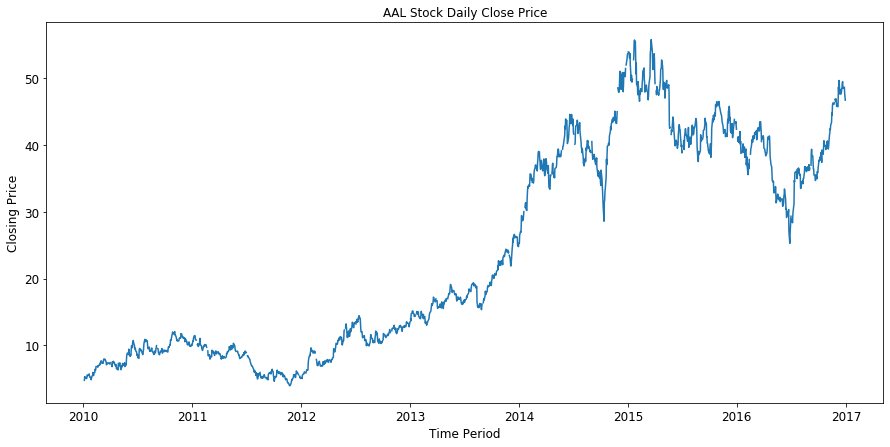

In [104]:
plt.plot(prices_aal['close'])
plt.xlabel('Time Period')
plt.ylabel('Closing Price')
plt.title('AAL Stock Daily Close Price');

There seems to be a break in some periods after 2015. Now this is something to look closer. 

In [105]:
# Check for the null values in the dataset
prices_aal['close'].isnull().sum()

63

Great, there are null values in the dataset. Possibly these are weekdays which could be holidays or days not holidays but with missing values. 

- We need to first drop the holidays from the dataset
- Impute the remaining dates with null values with one of the imputing strategy. 

In [106]:
# create a list of the dates in the stock
date_list = prices_aal.index

- We will explore all the holiday dates from 2010 to 2016 in USA and remove those date values from the index. 
- After this, whichever date has a missing value will be imputed

In [107]:
# import the holiday library
from datetime import date
import holidays

In [108]:
# initialize the holidays object, this returns a dict
us_holidays = holidays.UnitedStates()

In [109]:
# view the holidays in the US during the period 2010 till end of 2016
for date in holidays.UnitedStates(years = [2010,2011,2012,2013,2014,2015,2016]).items():
    print (date)

(datetime.date(2016, 1, 1), "New Year's Day")
(datetime.date(2016, 1, 18), 'Martin Luther King, Jr. Day')
(datetime.date(2016, 2, 15), "Washington's Birthday")
(datetime.date(2016, 5, 30), 'Memorial Day')
(datetime.date(2016, 7, 4), 'Independence Day')
(datetime.date(2016, 9, 5), 'Labor Day')
(datetime.date(2016, 10, 10), 'Columbus Day')
(datetime.date(2016, 11, 11), 'Veterans Day')
(datetime.date(2016, 11, 24), 'Thanksgiving')
(datetime.date(2016, 12, 25), 'Christmas Day')
(datetime.date(2016, 12, 26), 'Christmas Day (Observed)')
(datetime.date(2010, 1, 1), "New Year's Day")
(datetime.date(2010, 12, 31), "New Year's Day (Observed)")
(datetime.date(2010, 1, 18), 'Martin Luther King, Jr. Day')
(datetime.date(2010, 2, 15), "Washington's Birthday")
(datetime.date(2010, 5, 31), 'Memorial Day')
(datetime.date(2010, 7, 4), 'Independence Day')
(datetime.date(2010, 7, 5), 'Independence Day (Observed)')
(datetime.date(2010, 9, 6), 'Labor Day')
(datetime.date(2010, 10, 11), 'Columbus Day')
(date

In [110]:
# create a list of all the holidays in US from 2010 till end of 2016
holiday = []

for date in holidays.UnitedStates(years=[2010,2011,2012,2013,2014,2015,2016]).keys():
    holiday.append(date)

In [111]:
# retrieve all the rows which have null values
null_date = prices_aal[prices_aal.isnull().any(axis=1)]

In [112]:
# check the initial 5 values
null_date.head()

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-18,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-15,NaN,NaN,NaN,NaN,NaN,NaN
2010-04-02,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-31,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-05,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
# take the dates which are index and convert it to a list
null_dates = null_date.index.tolist()

In [114]:
# check the first 10 values
null_dates[:10]

[Timestamp('2010-01-18 00:00:00'),
 Timestamp('2010-02-15 00:00:00'),
 Timestamp('2010-04-02 00:00:00'),
 Timestamp('2010-05-31 00:00:00'),
 Timestamp('2010-07-05 00:00:00'),
 Timestamp('2010-09-06 00:00:00'),
 Timestamp('2010-11-25 00:00:00'),
 Timestamp('2010-12-24 00:00:00'),
 Timestamp('2011-01-17 00:00:00'),
 Timestamp('2011-02-21 00:00:00')]

Now the challenge is to get rid of the rows where the index of the dataframe is matching with the dates in the holidays list

In [115]:
len(null_dates)

63

In [116]:
len(holiday)

78

Seems like there were more holidays than the number of nulls in the dataset. We will ignore any rows which is not null. 

In [117]:
non_holidays = [x for x in null_dates if x not in holiday]

In [118]:
non_holidays

[Timestamp('2010-04-02 00:00:00'),
 Timestamp('2011-04-22 00:00:00'),
 Timestamp('2012-04-06 00:00:00'),
 Timestamp('2012-10-29 00:00:00'),
 Timestamp('2012-10-30 00:00:00'),
 Timestamp('2013-03-29 00:00:00'),
 Timestamp('2014-04-18 00:00:00'),
 Timestamp('2015-04-03 00:00:00'),
 Timestamp('2016-03-25 00:00:00')]

Run through the list of dates in the index and compare if that date in in the holidays. If it matches, then drop that matching row from the dataframe.

In [119]:
# run through the date list and drop if it is on a holiday --> only missing rows on non-holidays
# will remain
for d in prices_aal.index.tolist():
    if d in holiday:
        prices_aal = prices_aal.drop(d)
        

In [120]:
# check the remaininng number of missing values
prices_aal.isnull().sum()

symbol    9
open      9
close     9
low       9
high      9
volume    9
dtype: int64

Now, only the non holiday dates with missing values are remaining. Will use forward or backward fill to impute these rows.

In [121]:
# use backward fill to impute the missing values
prices_aal_modified = prices_aal.bfill(axis='rows')

In [122]:
# check the missing values --- > there should not be any now !
prices_aal_modified.isnull().sum()

symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

## Split the dataset into train, validation and test set
- 80% of the data into train set and 20% into the test set
- The model will be trained on the train data and validated into the test set. 
- Subsequently will use the model to predict into the real future. 

In [123]:
len(prices_aal_modified)

1756

In [124]:
# determine the length of the train and test set
train_len = int(0.8 * len(prices_aal_modified))
test_len = int(0.2 * len(prices_aal_modified))

In [125]:
# create the train data
train_data = prices_aal_modified[0:train_len]

In [126]:
train_data.head()

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-04,AAL,4.84,4.77,4.66,4.94,9837300.0
2010-01-05,AAL,4.79,5.31,4.71,5.37,25212000.0
2010-01-06,AAL,5.19,5.09,5.00,5.38,16597900.0
2010-01-07,AAL,5.06,5.24,5.05,5.43,14033400.0
2010-01-08,AAL,5.27,5.14,5.06,5.43,12760000.0


In [127]:
# create the test data sequence
test_data = prices_aal_modified[train_len:train_len+test_len]

In [128]:
test_data.head()

,symbol,open,close,low,high,volume
date,,,,,,
2015-08-06,AAL,43.250000,42.180000,41.759998,43.450001,7395500.0
2015-08-07,AAL,42.209999,41.490002,41.400002,42.480000,5588600.0
2015-08-10,AAL,41.750000,41.680000,41.450001,42.430000,6860600.0
2015-08-11,AAL,41.740002,42.700001,41.650002,43.419998,10378600.0
2015-08-12,AAL,42.369999,42.520000,40.680000,42.680000,10391900.0


## Feature scaling

In [129]:
from sklearn.preprocessing import StandardScaler

In [130]:
scaler = StandardScaler()

In [131]:
train_data = train_data.drop('symbol',axis=1)
test_data = test_data.drop('symbol',axis=1)


In [132]:
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

In [133]:
train_data.shape

(1404, 5)

In [134]:
test_data.shape

(351, 5)

## Data preparation for RNN 
- LSTM/GRU expects data to be in three dimensions whereas the currently the data is in 2 dimensions
- I will make use of the TimeSeriesGenerator to prepare the data for LSTM/GRU model
- Refer the following link for some great advice from an expert
https://machinelearningmastery.com/reshape-input-data-long-short-term-memory-networks-keras/


The three dimensions of this input are:

- Samples. One sequence is one sample. A batch is comprised of one or more samples.
- Time Steps. One time step is one point of observation in the sample.
- Features. One feature is one observation at a time step.
    

In [135]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [136]:
# define the following
n_input = 30   # the number of samples
n_features = 5 # the number of features to be predicted 
batch_size = 1 # the number of batch size 

In [137]:
generator = TimeseriesGenerator(data=train_data,targets=train_data,length=n_input,batch_size=batch_size)

In [138]:
X_train,y_train = generator[0]

In [139]:
X_train

array([[[-1.01738111, -1.0221086 , -1.01969524, -1.02161387,
          0.06445885],
        [-1.02074299, -0.9857873 , -1.01628418, -0.99308108,
          2.32586376],
        [-0.99384796, -1.00058486, -0.99650006, -0.99241753,
          1.05884924],
        [-1.00258884, -0.99049561, -0.993089  , -0.98909976,
          0.6816469 ],
        [-0.98846895, -0.99722178, -0.99240679, -0.98909976,
          0.49434744],
        [-0.99788221, -1.00394795, -1.00059333, -1.00237082,
          0.22854812],
        [-1.00258884, -1.00125748, -0.9992289 , -1.00767925,
         -0.22485954],
        [-0.99855459, -0.97435281, -0.99513564, -0.98445489,
          1.02981444],
        [-0.97569381, -0.96695403, -0.9685294 , -0.97052027,
          0.49539175],
        [-0.96359105, -0.97300758, -0.96716498, -0.96189408,
          0.23331371],
        [-0.97300431, -0.96359095, -0.9623895 , -0.96919317,
         -0.23406714],
        [-0.96291868, -0.95686478, -0.95488518, -0.95857631,
          0.572

In [140]:
y_train

array([[-0.87954408, -0.88556741, -0.8764309 , -0.88691257, -0.03680995]])

In [141]:
# check the shape of the X_train and y_train ---- > should be 3D for X_train for LSTM model input
X_train.shape

(1, 30, 5)

In [142]:
y_train.shape

(1, 5)

## Train the Model

In [143]:
# import the models and the required layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout,GRU
from tensorflow.keras.callbacks import EarlyStopping

In [144]:
import keras
keras.backend.clear_session()

In [147]:
# Early stop criteria
early_stop = EarlyStopping(patience=10,monitor='val_loss',restore_best_weights=True)

In [148]:
# validation data during the model training
validation_generator = TimeseriesGenerator(data=test_data,targets=test_data,length=n_input,
                                          batch_size=batch_size)

In [149]:
X_test,y_test = validation_generator[0]

In [150]:
X_test.shape

(1, 30, 5)

In [151]:
y_test.shape

(1, 5)

### Train a GRU Model

In [155]:
model = Sequential()

# Add the first GRU layer
model.add(GRU(units=100,activation='tanh',return_sequences=True,input_shape=(n_input,n_features)))
model.add(Dropout(0.2))

# Add the second GRU layer
model.add(GRU(units=150,activation='tanh',return_sequences=True,input_shape=(n_input,n_features)))
model.add(Dropout(0.2))

# Add the third GRU layer and a dropout
model.add(GRU(units=100,activation='tanh'))
model.add(Dropout(0.2))

# the output layer --- >  5 neurons equal to the total features which is 5
model.add(Dense(n_features,activation='linear',kernel_initializer='he_normal'))

# compile the model
model.compile(optimizer='adam',loss='mse')

In [156]:
# fit the model --- > will use fit_generator instead of fit 
model.fit_generator(generator=generator,epochs=100,callbacks=[early_stop],validation_data=validation_generator,
                    verbose=1)

Epoch 1/100
1374/1374 [==============================] - 116s 85ms/step - loss: 0.2141 - val_loss: 0.0815
Epoch 2/100
1374/1374 [==============================] - 105s 76ms/step - loss: 0.1940 - val_loss: 0.1799
Epoch 3/100
1374/1374 [==============================] - 104s 76ms/step - loss: 0.1860 - val_loss: 0.0827
Epoch 4/100
1374/1374 [==============================] - 105s 76ms/step - loss: 0.1825 - val_loss: 0.1233
Epoch 5/100
1374/1374 [==============================] - 98s 71ms/step - loss: 0.1810 - val_loss: 0.0636
Epoch 6/100
1374/1374 [==============================] - 98s 71ms/step - loss: 0.1818 - val_loss: 0.0662
Epoch 7/100
1374/1374 [==============================] - 105s 76ms/step - loss: 0.1803 - val_loss: 0.0760
Epoch 8/100
1374/1374 [==============================] - 97s 71ms/step - loss: 0.1761 - val_loss: 0.0669
Epoch 9/100
1374/1374 [==============================] - 96s 70ms/step - loss: 0.1756 - val_loss: 0.1141
Epoch 10/100
1374/1374 [==========================

In [158]:
loss = pd.DataFrame(model.history.history)

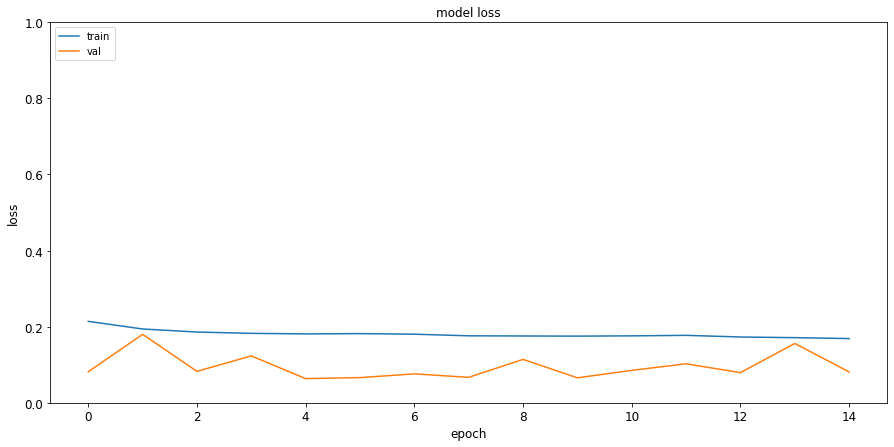

In [159]:
plt.plot(loss['loss']) # plotting the train loss
plt.plot(loss['val_loss']) # plotting the validation loss

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim(0,1)
plt.legend(['train','val'], loc = 'upper left')
plt.show()


### Save the trained model

In [160]:
model.save('prd_stock_GRU_model.h5')

## Prediction

In [234]:
# use the model and predict_generator to get the scaled predictions 
pred = model.predict_generator(validation_generator)

In [236]:
# inverse transform the scaled predictions to get the true predictions
true_pred = scaler.inverse_transform(pred)

In [237]:
# check the true predictions
true_pred

array([[4.1236046e+01, 4.1500195e+01, 4.1955238e+01, 4.2749043e+01,
        1.0667255e+07],
       [4.1784637e+01, 4.2171791e+01, 4.2446953e+01, 4.3339081e+01,
        1.0818615e+07],
       [4.1250835e+01, 4.1843929e+01, 4.2191643e+01, 4.2818733e+01,
        8.4019090e+06],
       ...,
       [4.4683849e+01, 4.5321663e+01, 4.6429749e+01, 4.6593815e+01,
        6.4776710e+06],
       [4.4511955e+01, 4.5065033e+01, 4.6231419e+01, 4.6357819e+01,
        6.4976940e+06],
       [4.4470421e+01, 4.4991379e+01, 4.6269623e+01, 4.6354004e+01,
        7.0963260e+06]], dtype=float32)

In [255]:
# confirm the len of the validation set -- > use as input to carve for plotting the actual
len(validation_generator)

321

In [250]:
# test subset from the actual dataset
prices_aal_test = prices_aal_modified[-321:]

In [265]:
prices_aal_test

,symbol,open,close,low,high,volume
date,,,,,,
2015-09-21,AAL,43.720001,43.230000,42.880001,44.009998,6687200.0
2015-09-22,AAL,42.770000,41.189999,40.919998,43.080002,12483700.0
2015-09-23,AAL,41.320000,41.240002,40.500000,41.500000,8248800.0
2015-09-24,AAL,41.150002,40.250000,39.919998,41.150002,10507300.0
2015-09-25,AAL,40.930000,40.240002,39.919998,41.029999,7524900.0
...,...,...,...,...,...,...
2016-12-23,AAL,48.610001,48.480000,48.290001,48.840000,2914800.0
2016-12-27,AAL,48.290001,48.610001,48.139999,48.919998,2797800.0
2016-12-28,AAL,48.730000,47.669998,47.610001,48.830002,4153600.0


In [251]:
# create a data frame of the predicted values
predicted_df = pd.DataFrame(true_pred,columns=[['open','close','low','high','volume']],
                           index=prices_aal_test.index)

In [252]:
predicted_df

,open,close,low,high,volume
date,,,,,
2015-09-21,41.236046,41.500195,41.955238,42.749043,10667255.0
2015-09-22,41.784637,42.171791,42.446953,43.339081,10818615.0
2015-09-23,41.250835,41.843929,42.191643,42.818733,8401909.0
2015-09-24,40.480991,40.636974,41.029469,41.806343,10623074.0
2015-09-25,40.053864,40.576004,40.955688,41.567089,8690319.0
...,...,...,...,...,...
2016-12-23,45.400753,46.053040,47.047577,47.320217,6892383.5
2016-12-27,45.057758,45.619659,46.718128,46.920105,6979529.5
2016-12-28,44.683849,45.321663,46.429749,46.593815,6477671.0


In [263]:
# trim the dataframe to contain only the close column --- > to address error during plotting
predicted_df_close = predicted_df.drop(['open','low','high','volume'],axis=1)

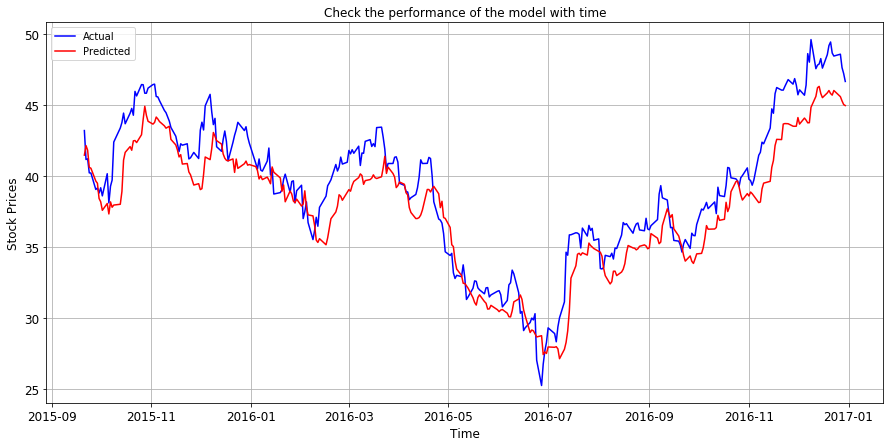

In [264]:
# plot the predicted vs the actual and compare the results
plt.plot(prices_aal_test['close'] , 'b')
plt.plot(predicted_df_close , 'r')

plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Check the performance of the model with time')
plt.legend(['Actual', 'Predicted'], loc='upper left')

plt.grid(True)
plt.show()